In [11]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
import scipy
import scipy.fftpack

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")


def plot2din3d(x,y,z):
    ax.plot(x, y, zs=z, zdir='z')
    d_col_obj = ax.fill_between(x, 0.5, y, step='pre', alpha=0.1) 
    ax.add_collection3d(d_col_obj, zs = z, zdir = 'z')

# Plot a sin curve using the x and y axes.
for z in range(0, 50, 5):
    x = np.linspace(0, 1, 100)
    y = z*np.sin(x * 2 * np.pi) / 50 / 2 + 0.5
    plot2din3d(x, y, z)

#ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.view_init(elev=20., azim=-35)

plt.show()




In [20]:
caminho = "../DatasetEnsaios/Ensaio_2023-12-19_1/SW10P/2000RPM.csv"
vibration_data = pd.read_csv(caminho, sep=',') #importando o arquivo
dt  = 3.906250E-5 #tempo entre amostras
N  = len(vibration_data['tempo']) #numero de amostras 
tempo = vibration_data['tempo']
vibracao = vibration_data['vibracao']
tensao = vibration_data['tensao']


yf = scipy.fft.fft(vibracao.values)
xf = fftfreq(N, dt)[:N//2]

rotacoes = np.arange(2000, 4501, 1000)

amplitudes_final = []
for rpm in rotacoes:
    arquivo = "../DatasetEnsaios/Ensaio_2023-12-19_1/SW10P/"+str(rpm)+"RPM.csv"
    df = pd.read_csv(arquivo, sep=',')
    vibracao = df['vibracao']
    yf = scipy.fft.fft(vibracao.values)
    amplitudes = 2.0 / N * np.abs(yf[0:N//2])
    amplitudes_final.append(amplitudes)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo os dados
rotacoes = np.arange(2000, 4501, 250)
frequencias = np.linspace(0, 3840, num=3840)
amplitude = np.ones_like(frequencias) * 0.5  # Amplitude constante inicial para todos os pontos
amplitudes = 2.0 / N * np.abs(yf[0:N//2])
amp_teste =  np.random.randint(0, 5, size=3840) * np.ones_like(frequencias)


# Criando a figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando o gráfico
for rotacao in rotacoes:
    ax.plot(rotacao * np.ones_like(frequencias), frequencias, amp_teste )

# Definindo rótulos dos eixos
ax.set_xlabel('Rotações (RPM)')
ax.set_ylabel('Frequências')
ax.set_zlabel('Amplitude')

# Exibindo o gráfico
#plt.show()

[2000 3000 4000]


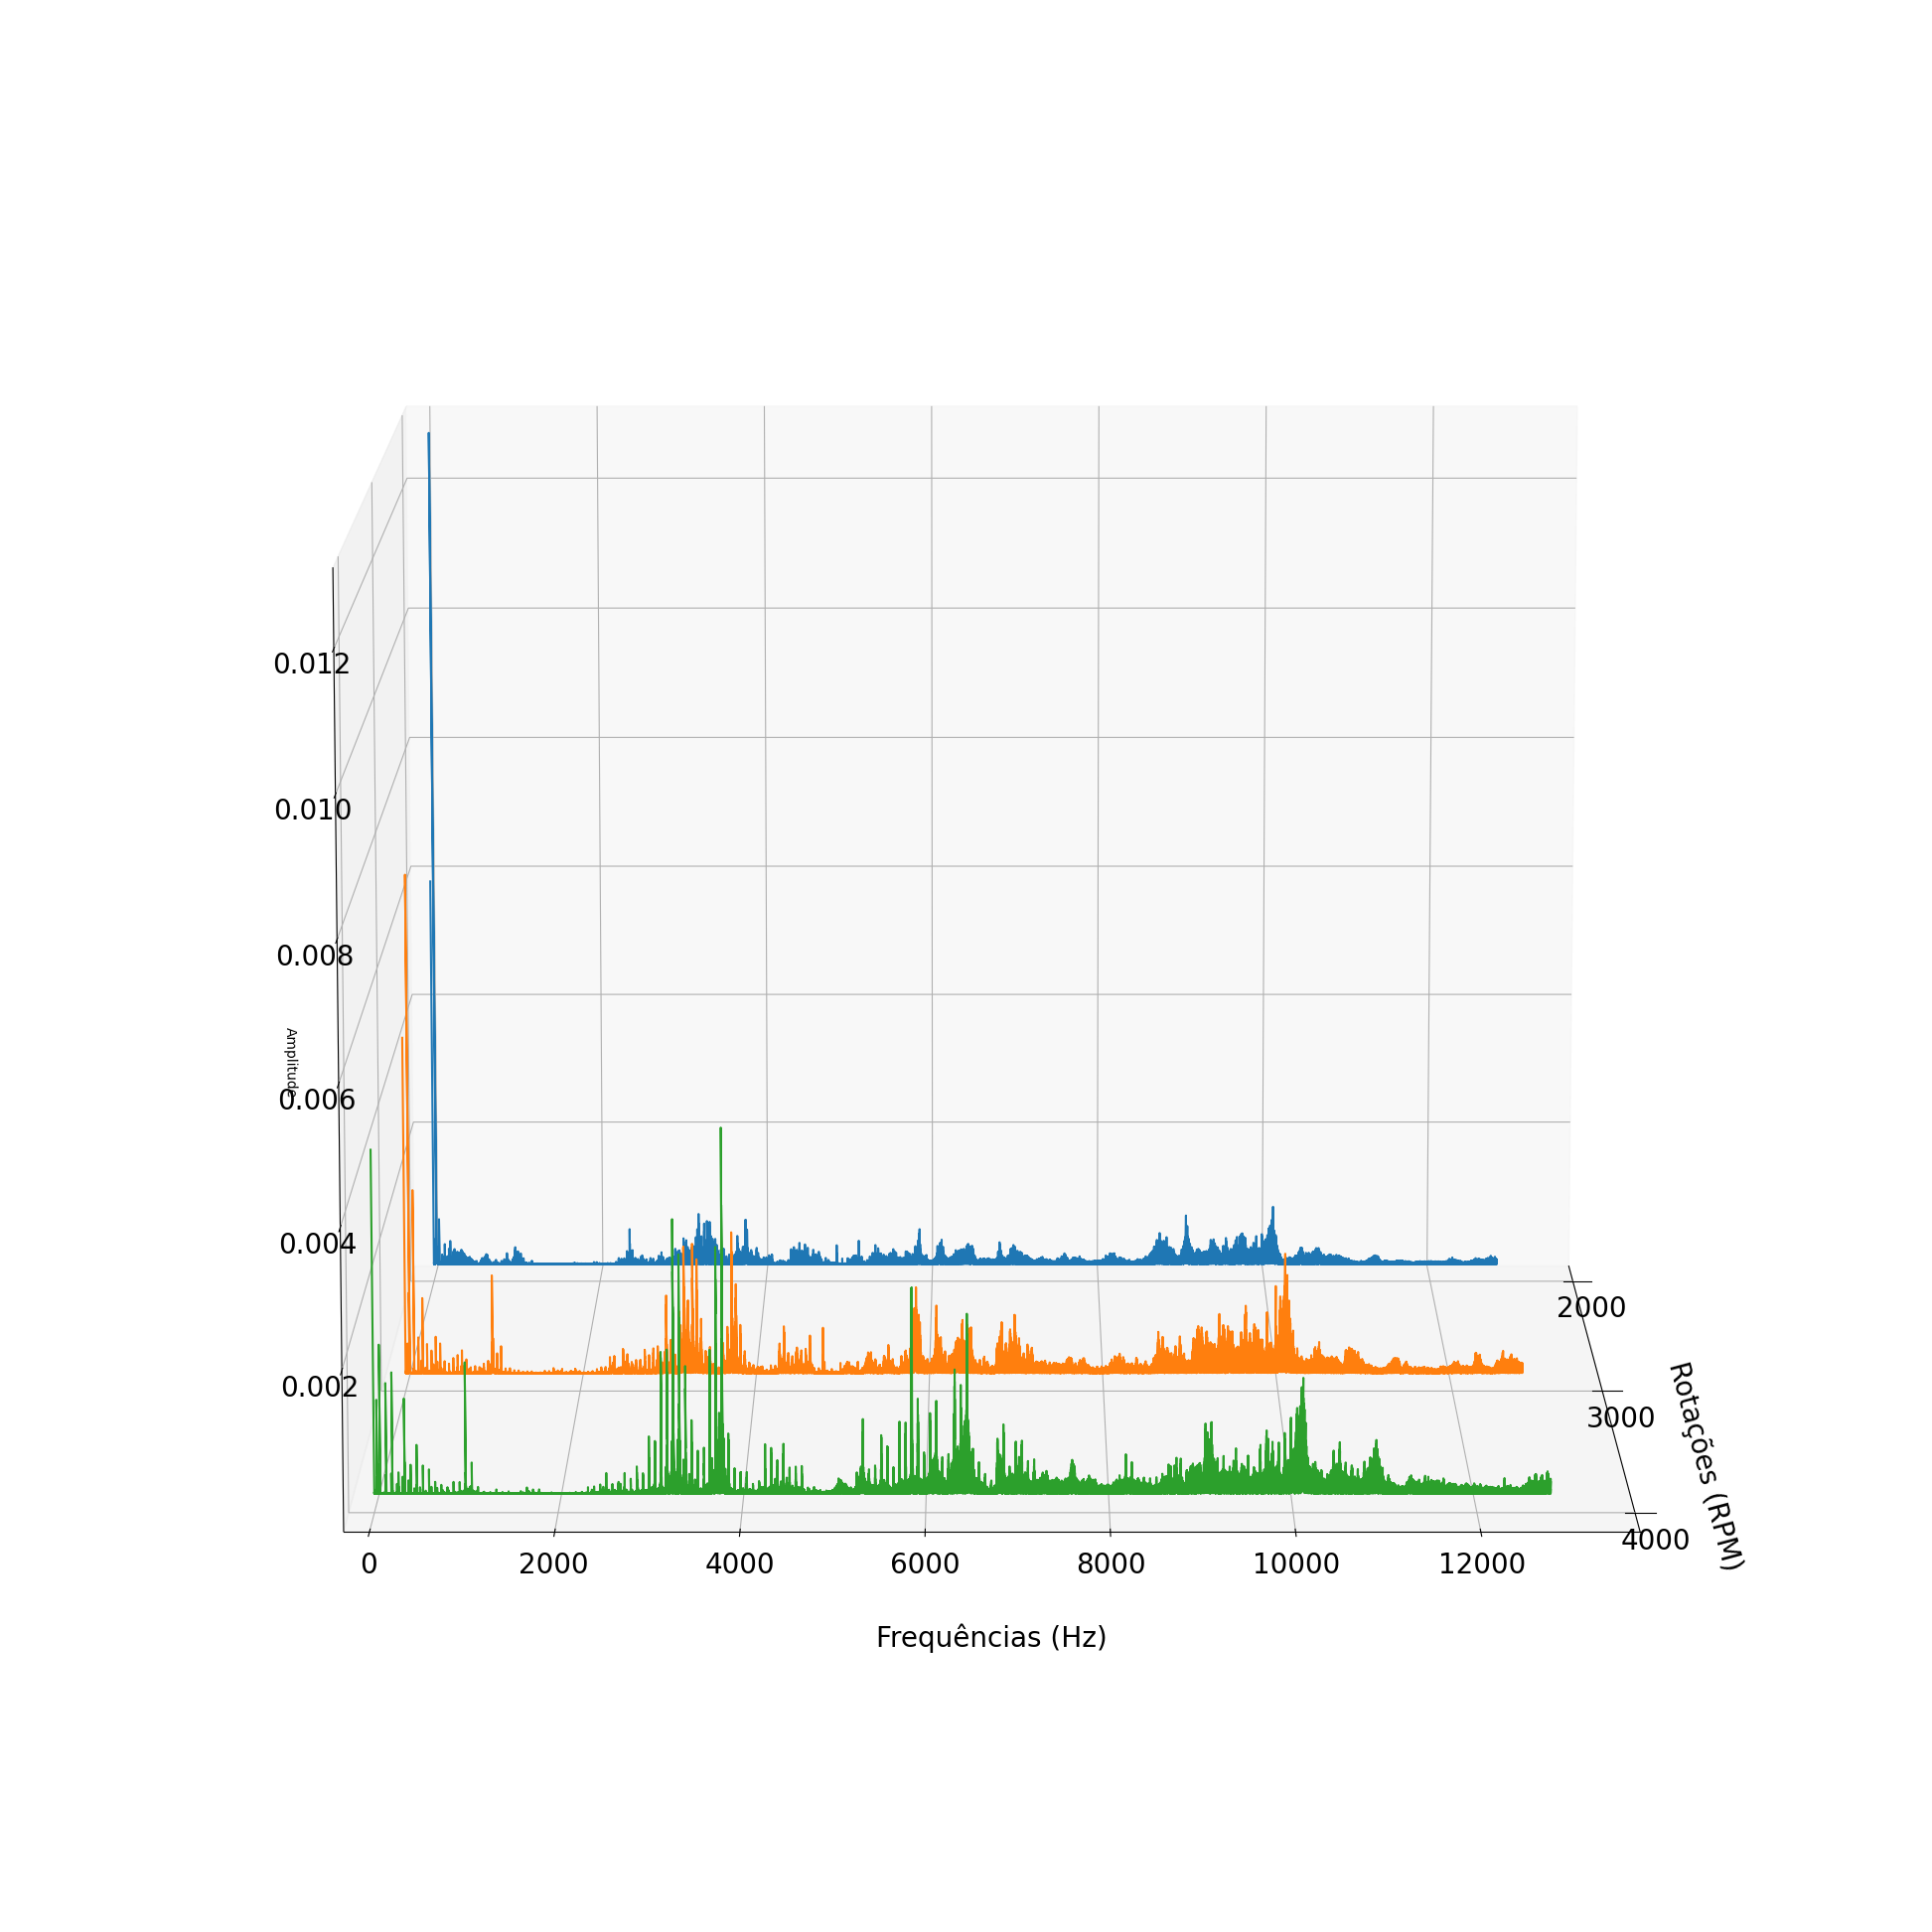

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo os dados
rotacoes = np.arange(2000, 4501, 1000)
print(rotacoes)
#frequencias = np.linspace(0, 3840, num=100)  # Reduzindo o número de pontos para melhor visualização
frequencias = xf
num_frequencias = len(frequencias)
amplitude = np.random.randint(0, 5, size=num_frequencias)  # Amplitude aleatória para cada frequência
amplitudes = 2.0 / N * np.abs(yf[0:N//2])


# Criando a figura
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')

# Plotando o gráfico
for i, rotacao in enumerate(rotacoes):
    ax.plot(np.ones(num_frequencias) * rotacao, frequencias, amplitudes_final[i])


# Definindo rótulos dos eixos
ax.set_xlabel('Rotações (RPM)',fontsize=20, labelpad=40)
ax.set_ylabel('Frequências (Hz)',fontsize=20, labelpad=40)
ax.set_zlabel('Amplitude')

#ax.set_xticks(np.arange(1, 4, 1))  # Define os ticks no eixo x

ax.view_init(elev=10, azim=-0)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(range(2000,4501, 1000)) 

#plt.yticks(range(0,100, 5), rotation=45) 
#ax.set_xlim(2000, 4500)
ax.set_ylim(0)
#ax.set_zlim(0, 0.013)


plt.grid()


# Exibindo o gráfico
plt.show()


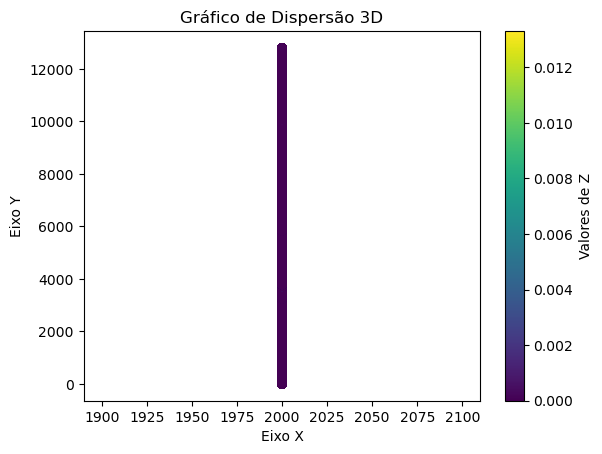

In [22]:


# Dados para a cor dos pontos (eixo z)
plt.scatter(np.ones(num_frequencias) * 2000, frequencias, c=amplitudes, cmap='viridis', vmin=0, vmax=0.0133)

# Plotando o gráfico
#for i, rotacao in enumerate(rotacoes):
    #ax.plot(np.ones(num_frequencias) * rotacao, frequencias, amplitudes_final[i])
 #   plt.scatter(np.ones(num_frequencias) * rotacao, frequencias, c=amplitudes_final[i], cmap='viridis')  # 'viridis' é uma colormap, você pode escolhe

plt.colorbar(label='Valores de Z')  # Adiciona uma barra de cores indicando os valores de Z
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Dispersão 3D')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo os intervalos para os eixos
rotacoes = np.arange(2000, 4501, 250)
#frequencias = xf
frequencias = np.linspace(0, 3840, num=3840)  # 38400 pontos
amplitude = 1.0  # Amplitude inicial para todos os pontos

# Criando uma grade de valores para os eixos X e Y
X, Y = np.meshgrid(rotacoes, frequencias)

# Criando uma matriz para armazenar a amplitude para cada ponto (X, Y)
Z = np.ones_like(X) * amplitude

# Criando a figura e os eixos 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando o gráfico de dispersão 3D
ax.scatter(X, Y, Z)

# Definindo rótulos dos eixos
ax.set_xlabel('Rotações (RPM)')
ax.set_ylabel('Frequências')
ax.set_zlabel('Amplitude')

# Exibindo o gráfico
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os valores para x e y
x = [1, 2, 3]
y = [4, 5, 6]

# Criando a matriz de coordenadas usando np.meshgrid
X, Y = np.meshgrid(x, y)

# Plotando o gráfico de dispersão
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='red', marker='o')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de Dispersão')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo os valores para x e y
x = [1, 2, 3]
y = [4, 5, 6]

# Criando a matriz de coordenadas usando np.meshgrid
X, Y = np.meshgrid(x, y)

# Definindo a matriz Z para os valores da série
Z = np.zeros_like(X)

# Plotando a série de pontos em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Adicionando rótulos aos eixos
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.set_zlabel('Coordenada Z')
ax.set_title('Série de Pontos em 3D')

# Adicionando uma barra de cores para a superfície
fig.colorbar(surf)

plt.show()